In [19]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math as m

#plotting
plt.rcParams.update({'font.size': 16})

In [46]:
# dataset
taiwan_daily = np.array([2,0,0,0,1,1,1,4,1,0,2,1,2,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,1])
taiwan_total = np.cumsum(taiwan_daily)
M = len(taiwan_daily)

In [47]:
# offspring distribution
def Offspring(R0, k, Omax):
    # function creates an offspring distribution 
    # R0: mean
    # k: overdispersion parameter
    # Omax: maximum number of offspring o to consider
    children = np.zeros(Omax+1)
    os = np.arange(0,Omax+1)
    
    # Draws number from offspring distribution with P(O = o)
    for o in os:
        children[o] = m.gamma(k+o)/(m.factorial(o)*m.gamma(k))*((R0/(R0+k))**o)*(1+R0/k)**-k
    
    return children

0.9999999999996602


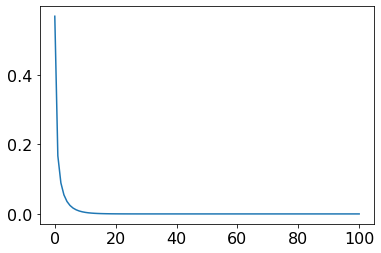

In [50]:
# sanity check
offspring_test = Offspring(1.3, 0.38, 100)
print(np.sum(offspring_test))

plt.plot(offspring_test)

In [51]:
# serial interval
serial_interval = np.array([0,0.05,0.1,0.3,0.25,0.1,0.05,0.05,0.05,0.03,0.02])
np.sum(serial_interval)

1.0

In [123]:
def Simulation(R0, k, t, Nsim):
    # function which performs simulations of new secondary cases, dependent on random numbers arising from
    # offspring distribution & serial interval
    # returns proportion of simulations which records cases beyond day t (outbreak) 
    
    # INPUTS:
    # R0: mean of offspring distribution
    # k: overdispersion of offspring distribution
    # M: days of recorded data
    # Nsim: number of simulations to run
    
    # historic days
    days = np.arange(1,M+1)
    # stores instances of outbreaks
    outbreaks = 0
    
    for n in range(Nsim):        
        # stores dates of secondary infections
        newdates = []
    
        for j in days:
            newcases = taiwan_daily[j-1]
        
            for i in range(newcases):
                # draw random number from offspring distribution
                O = np.random.choice(range(101), p = Offspring(R0,k,100))
            
                for o in range(O):
                    # draw random number from serial interval
                    S = np.random.choice(range(11), p = serial_interval)
        
                    # assign date of infection to new case
                    newdates += [j+S]
    
        # record an outbreak if any secondary cases arise after day M
        if max(newdates) > t:
            outbreaks += 1
    
    return outbreaks/Nsim

In [128]:
# parameters
R0 = 1.3
k = 0.38
t = M+1
N = 1000

Simulation(R0,k,t,N)

0.527

In [129]:
future = 15
ts = np.arange(M,M+future)
probs = np.zeros(future)

for t in ts:
    probs[t-M] = Simulation(R0,k,t,N)

Text(0, 0.5, 'Probability of Outbreak')

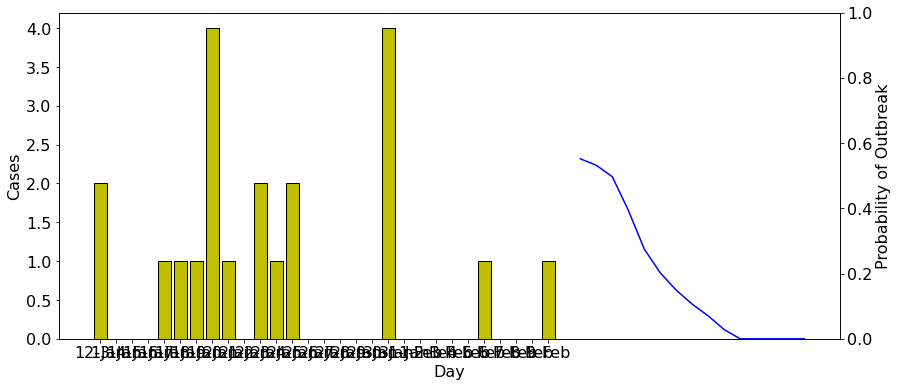

In [140]:
# plotting
fig, ax = plt.subplots(figsize=(14,6))
dates = ['12-Jan','13-Jan','14-Jan','15-Jan','16-Jan','17-Jan','18-Jan','19-Jan','20-Jan','21-Jan','22-Jan',
         '23-Jan','24-Jan','25-Jan','26-Jan','27-Jan','28-Jan','29-Jan','30-Jan','31-Jan','1-Feb','2-Feb',
         '3-Feb','4-Feb','5-Feb','6-Feb','7-Feb','8-Feb','9-Feb']

ax.bar(x=dates, height=taiwan_daily, color='y', edgecolor='k')
ax.set_xticks(dates,rotation=90,size=2)
ax.set_xlabel('Day')
ax.set_ylabel('Cases')
#ax.grid()

ax2 = ax.twinx()
ax2.plot(range(M+1,M+future+1),probs,'b')
ax2.set_ylim([0,1])
ax2.set_ylabel('Probability of Outbreak')
#ax2.grid()